## Logistic Regression

### Applicant's Probability of Admission

<p>Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.</p>

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
def load_data(data, delim):
    df = np.genfromtxt(data, delimiter=delim)
    return df

df = load_data('ex2data1.txt', ',')
df[0:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

### Get the features and Target of the data

In [3]:
length = len(df)
x = df[:, 0:2]
print(x[0:5])
y = df[:, 2].reshape(length, 1)
print(y[0:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Plot Data

In [4]:
pos = np.where(y == 1)
neg = np.where(y == 0)

In [5]:
pos[0]

array([ 3,  4,  6,  7,  8,  9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30,
       31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66,
       68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88,
       90, 91, 93, 94, 95, 96, 97, 98, 99])

In [6]:
x[pos, 0][0]

array([60.18259939, 79.03273605, 61.10666454, 75.02474557, 76.0987867 ,
       84.43281996, 82.30705337, 69.36458876, 53.97105215, 69.07014406,
       70.66150955, 76.97878373, 89.67677575, 77.92409145, 62.27101367,
       80.19018075, 61.37928945, 85.40451939, 52.04540477, 64.17698887,
       83.90239366, 94.44336777, 77.19303493, 97.77159928, 62.0730638 ,
       91.5649745 , 79.94481794, 99.27252693, 90.54671411, 97.64563396,
       74.24869137, 71.79646206, 75.39561147, 40.45755098, 80.27957401,
       66.74671857, 64.03932042, 72.34649423, 60.45788574, 58.84095622,
       99.8278578 , 47.26426911, 50.4581598 , 88.91389642, 94.83450672,
       67.31925747, 57.23870632, 80.366756  , 68.46852179, 75.47770201,
       78.63542435, 94.09433113, 90.44855097, 74.49269242, 89.84580671,
       83.48916274, 42.26170081, 99.31500881, 55.34001756, 74.775893  ])

In [7]:
x[pos, 1][0]

array([86.3085521 , 75.34437644, 96.51142588, 46.55401354, 87.42056972,
       43.53339331, 76.4819633 , 97.71869196, 89.20735014, 52.74046973,
       92.92713789, 47.57596365, 65.79936593, 68.97235999, 69.95445795,
       44.82162893, 72.80788731, 57.05198398, 69.43286012, 80.90806059,
       56.30804622, 65.56892161, 70.4582    , 86.72782233, 96.76882412,
       88.69629255, 74.16311935, 60.999031  , 43.39060181, 68.86157272,
       69.82457123, 78.45356225, 85.75993667, 97.53518549, 92.11606081,
       60.99139403, 78.03168802, 96.22759297, 73.0949981 , 75.85844831,
       72.36925193, 88.475865  , 75.80985953, 69.8037889 , 45.6943068 ,
       66.58935318, 59.51428198, 90.9601479 , 85.5943071 , 90.424539  ,
       96.64742717, 77.15910509, 87.50879176, 84.84513685, 45.35828361,
       48.3802858 , 87.10385094, 68.77540947, 64.93193801, 89.5298129 ])

In [8]:
x[neg, 0][0]

array([34.62365962, 30.28671077, 35.84740877, 45.08327748, 95.86155507,
       75.01365839, 39.53833914, 67.94685548, 67.37202755, 50.53478829,
       34.21206098, 93.1143888 , 61.83020602, 38.7858038 , 52.10797973,
       40.23689374, 54.63510555, 33.91550011, 74.78925296, 34.18364003,
       51.54772027, 82.36875376, 51.04775177, 62.22267576, 34.52451385,
       50.28649612, 49.58667722, 32.57720017, 35.28611282, 56.2538175 ,
       30.05882245, 44.66826172, 66.56089447, 49.07256322, 32.72283304,
       60.45555629, 82.22666158, 42.07545454, 52.34800399, 55.48216114])

In [9]:
x[neg, 1][0]

array([78.02469282, 43.89499752, 72.90219803, 56.31637178, 38.22527806,
       30.60326323, 76.03681085, 46.67857411, 42.83843832, 48.85581153,
       44.2095286 , 38.80067034, 50.25610789, 64.99568096, 63.12762377,
       71.16774802, 52.21388588, 98.86943574, 41.57341523, 75.23772034,
       46.85629026, 40.61825516, 45.82270146, 52.06099195, 60.39634246,
       49.80453881, 59.80895099, 95.59854761, 47.02051395, 39.26147251,
       49.59297387, 66.45008615, 41.09209808, 51.88321182, 43.30717306,
       42.50840944, 42.71987854, 78.844786  , 60.76950526, 35.57070347])

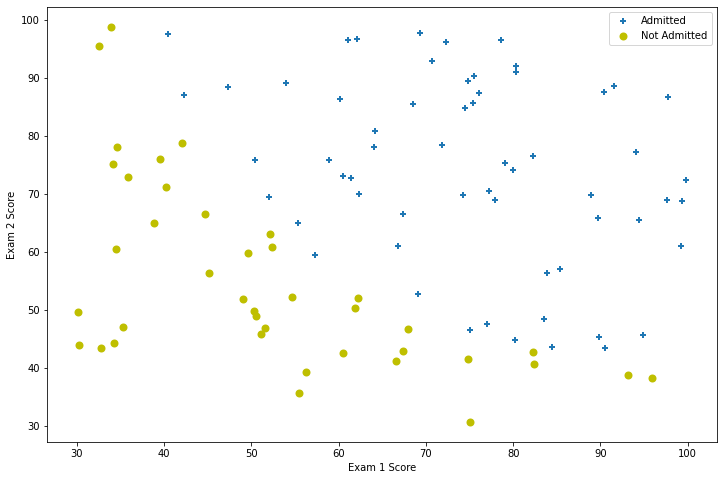

In [10]:
def plotData(x, y, marker, width, label, colour=None):
    plt.scatter(x, y, marker=marker, linewidth=width, label=label, color=colour)


plt.figure(figsize=(12, 8))
plotData(x[pos, 0][0], x[pos, 1][0], '+', 2, 'Admitted')
plotData(x[neg, 0][0], x[neg, 1][0], 'o', 2, 'Not Admitted', colour='y')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

In [11]:
X = np.c_[np.ones(length), x]
X.shape

(100, 3)

### Initial Fitting Parameters

In [12]:
m, n = X.shape
m, n

(100, 3)

In [13]:
initial_theta = np.zeros((n, 1))
initial_theta

array([[0.],
       [0.],
       [0.]])

### Sigmoid Function

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
sigmoid(0)

0.5

In [16]:
sigmoid(np.array([[0],[0]]))

array([[0.5],
       [0.5]])

In [17]:
np.log(sigmoid(np.dot(X, initial_theta))).shape

(100, 1)

### Cost Function

In [18]:
def compute_cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = (1 / m) * np.sum(np.dot(np.transpose(-y), np.log(h)) - np.dot(np.transpose(1 - y), np.log(1 - h)))
    grad = (1 / m) * (np.dot(np.transpose(X), (h-y)))
    return J

In [19]:
cost = compute_cost(initial_theta, X, y)
print(f"Cost at initial theta (zeros): {cost}")
# print(f"The gradient at initial theta (zeros) is: {grad}")

Cost at initial theta (zeros): 0.6931471805599453


In [20]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost = compute_cost(test_theta,X, y)
print(f"The Cost at test theta: {cost}")
# print(f"The gradient at test theta is: {grad}")

The Cost at test theta: 0.2183301938265977


### Optimizing using fminunc

In [21]:
X.shape, initial_theta.shape, y.shape

((100, 3), (3, 1), (100, 1))

In [22]:
from scipy.optimize import fmin
#options = {'maxiter': 100}
#minimize(CostFunction, initial_theta, args=(X, y), method=None, jac=gradientDescent, options=options)
optTheta, functionVal, iterations, functionCalls, warningFlags = \
    fmin(compute_cost, initial_theta, args=(X, y), maxiter=400, full_output=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [23]:
optTheta

array([-25.16130062,   0.20623142,   0.20147143])

In [24]:
functionVal

0.2034977015902151

In [25]:
iterations

157

In [26]:
functionCalls

287

In [27]:
warningFlags

0

### Plot Decision Boundary

[ 28.05882245 101.8278578 ]
[96.16594241 20.65402948]


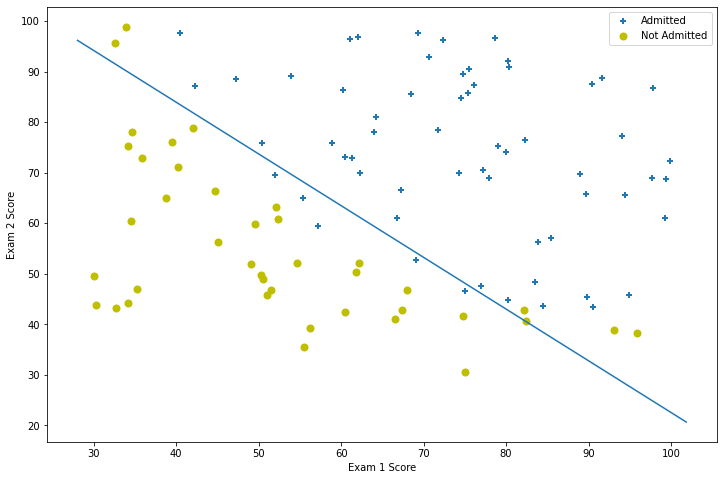

In [28]:
plt.figure(figsize=(12, 8))
plotData(x[pos, 0][0], x[pos, 1][0], '+', 2, 'Admitted')
plotData(x[neg, 0][0], x[neg, 1][0], 'o', 2, 'Not Admitted', colour='y')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

if X.shape[1] <= 3:
    plot_x = np.array([np.min(X[:, 1])-2, np.max(X[:, 1])+2])
    print(plot_x)
    plot_y = -(optTheta[0] + optTheta[1] * plot_x) / optTheta[2]
    print(plot_y)
    plt.plot(plot_x, plot_y)

In [29]:
def predict(X, theta):
    # if sigmoid(theta' * x) >= 0.5, predict 1 else 0
    
    h = sigmoid(np.dot(X, theta))
    p = np.round(h)
    return p

In [30]:
predict([1, 45, 85], optTheta)

1.0

In [31]:
p = predict(X, optTheta).reshape(length, 1)
print(f"Training Accuracy: {np.mean(p == y) * 100}%")

Training Accuracy: 89.0%


### Regularized Linear Regression: Microchips

<p>Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected</p>

In [797]:
df_micro = load_data('ex2data2.txt', ',')
df_micro[0:5]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [798]:
length = len(df_micro)
x = df_micro[:, :2]
print(x[:5])
y = df_micro[:, 2].reshape(length, 1)
print(y[:5])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


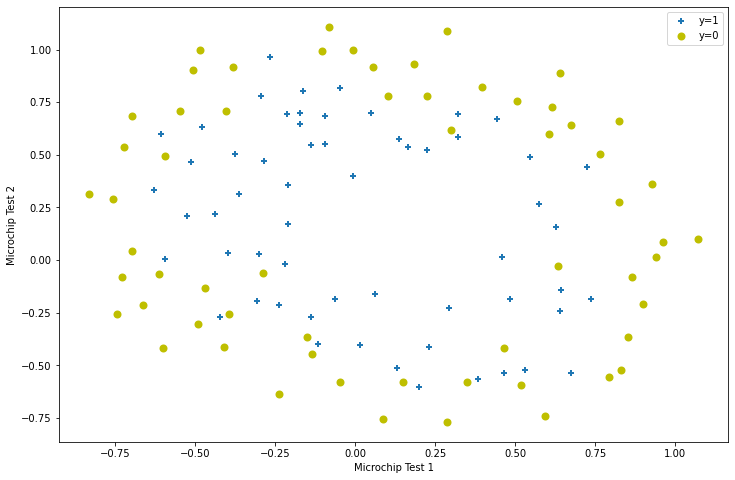

In [799]:
pos = np.where(y == 1)
neg = np.where(y == 0)

plt.figure(figsize=(12, 8))
plotData(x[pos, 0][0], x[pos, 1][0], '+', 2, 'y=1')
plotData(x[neg, 0][0], x[neg, 1][0], 'o', 2, 'y=0', colour='y')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

### Feature Mapping

In [800]:
def map_feature(X1, X2, degree):
    out = np.ones((len(X1),1))
    for i in np.arange(1, degree+1):
        for j in np.arange(i+1): 
            out = np.hstack((out, np.multiply(np.power(X1, (i-j)), np.power(X2, j)).reshape(len(X1), 1)))
    return out

In [801]:
X = map_feature(x[:, 0], x[:, 1], 6)
X.shape

(118, 28)

In [802]:
initial_theta = np.zeros((X.shape[1], 1))

In [803]:
# Set regularization parameter lambda to 1
l = .2
# Set initial value of theta
initial_theta.shape

(28, 1)

### Cost Function

In [804]:
def compute_cost_reg(theta, X, y, l):
    J = 0
    m = len(y)
    h = sigmoid(X @ theta)
    J = (1 / m) * np.sum(np.dot(np.transpose(-y), np.log(h)) - np.dot(np.transpose(1 - y), np.log(1 - h))) + (l / (2 * m) * np.sum(theta ** 2))
    return J

### Gradient Descent

In [805]:
def gradient_descent_reg(theta, X, y, l, alpha, num_iters):
    J_history = np.zeros((num_iters, 1), dtype=np.float)
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    for i in np.arange(num_iters):
        theta = theta - alpha * ((1 / m) * np.dot(np.transpose(X), (h - y)) + (l/m) * theta)
        J_history[i] = compute_cost_reg(theta, X, y, l)
    return theta, J_history

In [806]:
alpha = 0.01
num_iters = 900
theta, J_history = gradient_descent_reg(initial_theta, X, y, l, alpha, num_iters)

In [807]:
print(theta)

[[-0.07569304]
 [-0.16781109]
 [-0.00069464]
 [-0.44966718]
 [-0.10272734]
 [-0.33641408]
 [-0.16395162]
 [-0.06541576]
 [-0.0731731 ]
 [-0.2096868 ]
 [-0.3514532 ]
 [-0.02000039]
 [-0.11486312]
 [-0.02765223]
 [-0.35104407]
 [-0.17837429]
 [-0.0386731 ]
 [-0.03024692]
 [-0.0521457 ]
 [-0.03998124]
 [-0.27695646]
 [-0.27716421]
 [-0.00980176]
 [-0.05641051]
 [-0.00364866]
 [-0.06488976]
 [-0.01229425]
 [-0.34649618]]


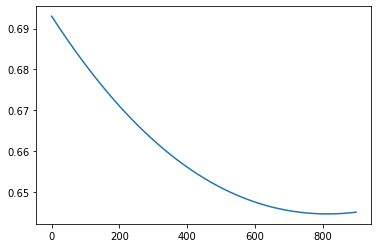

In [808]:
plt.plot(J_history)

### Advanced Optimization 

In [809]:
def costFunction(theta, X, y, l):
    J = 0
    m = len(y)
    grad = np.zeros(len(theta))
    h = sigmoid(X @ theta)
    thetaT = theta
    thetaT[0] = 0
    #J = (1 / m) * np.sum((-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))) + ((l / (2 * m)) * np.sum(thetaT ** 2));
    J = (1 / m) * np.sum(np.dot(np.transpose(-y), np.log(h)) - np.dot(np.transpose(1 - y), np.log(1 - h))) + (l / (2 * m) * np.sum(theta ** 2))
    #grad = (1 / m) * (X.T @ (h - y)) + (l / m) * thetaT
    grad = (1 / m) * (np.dot(np.transpose(X), (h-y))) + (l / m) * thetaT
    return J, grad

In [810]:
cost, grad = costFunction(initial_theta, X, y, l)
cost

0.6931471805599454

In [811]:
cost, grad[0:4]

(0.6931471805599454,
 array([[8.47457627e-03],
        [1.87880932e-02],
        [7.77711864e-05],
        [5.03446395e-02]]))

In [812]:
test_theta = np.ones((X.shape[1], 1))
l = 10

cost, grad = costFunction(test_theta,X, y, l)
print(f"Cost at test theta (with lambda = 10) is {cost}")
print(f"Gradient at test theta - first five values only: \n {grad[0:4]}")

Cost at test theta (with lambda = 10) is 3.1645093316150095
Gradient at test theta - first five values only: 
 [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]]


In [813]:
def gradient_descent_reg1(theta, X, y, l, alpha, num_iters):
    J_history = np.zeros((num_iters, 1), dtype=np.float)
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    for i in np.arange(num_iters):
        cost, grad = costFunction(theta, X, y, l)
        theta = theta - (alpha * grad)
        J_history[i] = cost
    return theta, J_history

In [814]:
tht, hist = gradient_descent_reg1(theta, X, y, .2, 1, 800)
tht

array([[ 0.09361491],
       [ 0.69761312],
       [ 1.7781011 ],
       [-0.03346222],
       [-1.90457183],
       [ 0.95498981],
       [ 0.72575493],
       [-1.09896446],
       [-0.54232873],
       [-0.16328587],
       [-2.51364266],
       [ 0.34863549],
       [-1.62813474],
       [-0.39777893],
       [-2.10418605],
       [-0.45044348],
       [-0.49919255],
       [ 0.03658822],
       [-0.85995882],
       [-0.63153219],
       [-0.89781412],
       [-2.35016943],
       [ 0.35334625],
       [-0.87967923],
       [ 0.27161446],
       [-1.049769  ],
       [-0.20781757],
       [-2.08448519]])

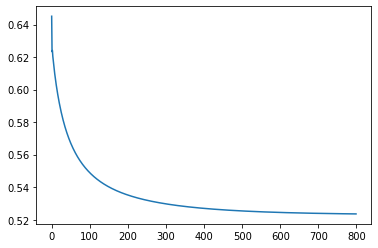

In [815]:
plt.plot(hist)

In [816]:
cost, grad = costFunction(tht, X, y, l)
cost

2.114169712335093

### Regularization and Accuracies

### Optimizing using fminunc

In [818]:
from scipy.optimize import minimize
options = {'maxiter': 400}
l = .2
fg = minimize(fun=compute_cost_reg, x0=initial_theta, args=(X, y, l), method='TNC', options=options)
print(fg)
adv_tht = fg.x
adv_tht

     fun: 0.43283059215668823
     jac: array([-3.23552851e-03,  4.79921658e-04, -2.60585997e-04, -8.21265278e-04,
       -7.89646126e-05, -1.05261355e-03,  1.43679513e-04, -5.29881694e-04,
       -2.24942287e-04,  2.99493763e-04, -8.52629078e-04,  2.25858221e-04,
       -1.71096470e-04, -3.70364850e-04, -8.64597283e-04, -3.66034980e-04,
        5.72430991e-05,  3.98431288e-04,  2.80797607e-04, -2.03198569e-04,
       -6.14847062e-04, -8.40494341e-04, -3.68161057e-04, -1.37745371e-04,
       -8.39661674e-05, -2.06079598e-04,  2.67263989e-04, -4.00790512e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 43
  status: 3
 success: False
       x: array([ 2.19208249,  1.48350264,  2.33258199, -3.33861777, -2.49446327,
       -3.06778849,  0.61488613, -1.08102591, -0.68764006,  0.02793612,
       -2.86850215,  0.32179456, -1.37786205, -1.04531046, -2.42546538,
       -0.58264017, -0.31919901,  0.45920342, -0.56970448, -0.91745824,
       -0.59058216, -2.33

array([ 2.19208249,  1.48350264,  2.33258199, -3.33861777, -2.49446327,
       -3.06778849,  0.61488613, -1.08102591, -0.68764006,  0.02793612,
       -2.86850215,  0.32179456, -1.37786205, -1.04531046, -2.42546538,
       -0.58264017, -0.31919901,  0.45920342, -0.56970448, -0.91745824,
       -0.59058216, -2.33855769,  0.03325168, -0.65403073,  0.15023501,
       -0.89637554, -0.41146004, -1.28890039])

In [819]:
p = predict(X, tht).reshape(length, 1)
print(f"Training Accuracy: {np.mean(p == y) * 100}%")

Training Accuracy: 71.1864406779661%


In [820]:
p = predict(X, adv_tht).reshape(length, 1)
print(f"Training Accuracy: {np.mean(p == y) * 100}%")

Training Accuracy: 83.05084745762711%


### Plot Decision Binary

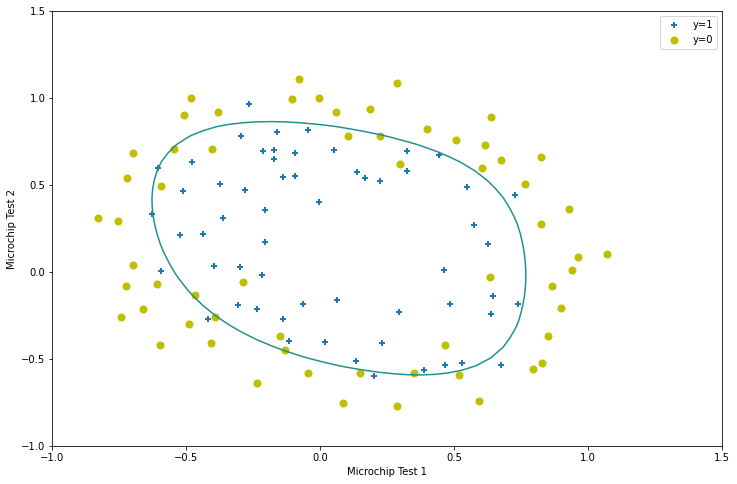

In [824]:
def map_feature_plot(X1,X2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (X1**(i-j) * X2**j)
            out= np.hstack((out,terms))
    return out

pos = np.where(y == 1)
neg = np.where(y == 0)
plt.figure(figsize=(12, 8))
plotData(x[pos, 0][0], x[pos, 1][0], '+', 2, 'y=1')
plotData(x[neg, 0][0], x[neg, 1][0], 'o', 2, 'y=0', colour='y')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()


u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

for i in np.arange(len(u)):
    for j in np.arange(len(v)):
        z[i,j] = map_feature_plot(u[i], v[j], 6) @ adv_tht
        
z = z.T
plt.contour(u, v, z, 0)